# SENTIMENT ANALYSIS OF TWEETS


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pysentimiento import create_analyzer
from sklearn.metrics import classification_report

c:\Users\USER\coding_samurai\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importing datasets

In [2]:
df=pd.read_csv('Tweets.csv',encoding='latin-1')
df.columns=['textID','text','selected_text','target']
df=df.bfill()
print(df.head())
print(df.isnull().sum())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text    target  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  
textID           0
text             0
selected_text    0
target           0
dtype: int64


# Preprocessing

In [3]:
df=df[['target','text']].copy()
df

,target,text
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!
2,negative,my boss is bullying me...
3,negative,what interview! leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t..."
...,...,...
27476,negative,wish we could come see u on Denver husband l...
27477,negative,I`ve wondered about rake to. The client has ...
27478,positive,Yay good for both of you. Enjoy the break - y...
27479,positive,But it was worth it ****.


In [4]:
def cleartext(text):
    text=re.sub(r'http\S+|www\S+',"",text)
    text=re.sub(r'@w\+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'[^A-Za-z0-9\s]','',text)
    text=text.lower().strip()
    return text
df['text']=df['text'].apply(cleartext)
df['text']

0                        id have responded if i were going
1               sooo sad i will miss you here in san diego
2                                   my boss is bullying me
3                            what interview leave me alone
4        sons of  why couldnt they put them on the rele...
                               ...                        
27476    wish we could come see u on denver  husband lo...
27477    ive wondered about rake to  the client has mad...
27478    yay good for both of you enjoy the break  you ...
27479                                  but it was worth it
27480    all this flirting going on  the atg smiles yay...
Name: text, Length: 27481, dtype: object

# Analying using pysentimientoBERTWeet

In [4]:
analyser=create_analyzer(task='sentiment',lang='en')

In [6]:
sam_df=df.sample(1000,random_state=47).reset_index(drop=True)

pred=[]
for text in tqdm(sam_df['text'],desc='Analyzing with BERTweet'):
    result=analyser.predict(text)
    pred.append(result.output)
sam_df['pred_senti']=pred
sam_df['pred_senti']=sam_df['pred_senti'].map({"NEG": "negative","NEU": "neutral","POS": "positive"})

Analyzing with BERTweet: 100%|██████████| 1000/1000 [01:15<00:00, 13.17it/s]


# Result

              precision    recall  f1-score   support

    negative       0.67      0.81      0.73       271
     neutral       0.78      0.53      0.63       420
    positive       0.68      0.84      0.76       309

    accuracy                           0.70      1000
   macro avg       0.71      0.73      0.71      1000
weighted avg       0.72      0.70      0.70      1000



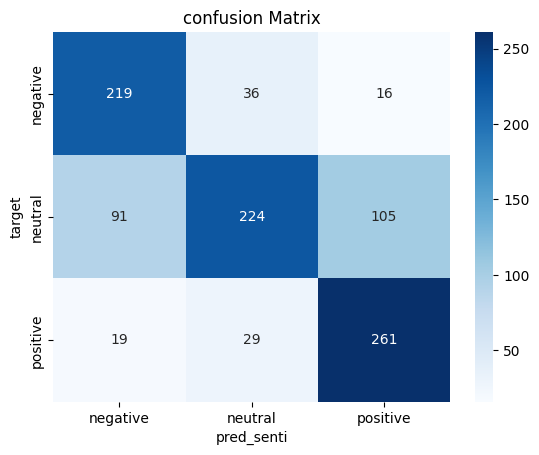

In [7]:
print(classification_report(sam_df['target'],sam_df['pred_senti']))
cm=pd.crosstab(sam_df['target'],sam_df['pred_senti'])
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion Matrix')
plt.show()

# Output prediction

In [24]:
analyser.predict('best')


AnalyzerOutput(output=POS, probas={POS: 0.744, NEU: 0.250, NEG: 0.006})

In [26]:
analyser.predict('worst')

AnalyzerOutput(output=NEG, probas={NEG: 0.931, NEU: 0.059, POS: 0.009})

In [27]:
analyser.predict('okok')

AnalyzerOutput(output=NEU, probas={NEU: 0.787, POS: 0.201, NEG: 0.011})